In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [14]:
import os
os.chdir('E:\projects\Malaria-Detection-master\Dataset')
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'

In [4]:
VGG = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
VGG.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
for layer in VGG.layers:
    layer.trainable = False

In [20]:
  # useful for getting number of output classes
folders = glob('E:\projects\Malaria-Detection-master\Dataset/Train/*')

In [24]:
folders

['E:\\projects\\Malaria-Detection-master\\Dataset/Train\\Parasite',
 'E:\\projects\\Malaria-Detection-master\\Dataset/Train\\Uninfected']

In [22]:
x = Flatten()(VGG.output)

In [25]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=VGG.input, outputs=prediction)

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [27]:
from tensorflow.keras.layers import MaxPooling2D

In [28]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [29]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
training_set = train_datagen.flow_from_directory('E:\projects\Malaria-Detection-master\Dataset\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [33]:
test_set = test_datagen.flow_from_directory('E:\projects\Malaria-Detection-master\Dataset\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [34]:
run= model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

c:\users\welcome\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
13/13 [==============================] - 32s 2s/step - loss: 1.5290 - accuracy: 0.5096 - val_loss: 0.7067 - val_accuracy: 0.4701
Epoch 2/50
13/13 [==============================] - 20s 2s/step - loss: 0.6320 - accuracy: 0.6202 - val_loss: 0.7045 - val_accuracy: 0.5896
Epoch 3/50
13/13 [==============================] - 20s 2s/step - loss: 0.5143 - accuracy: 0.7260 - val_loss: 0.8353 - val_accuracy: 0.3731
Epoch 4/50
13/13 [==============================] - 20s 1s/step - loss: 0.4538 - accuracy: 0.7837 - val_loss: 0.7799 - val_accuracy: 0.5373
Epoch 5/50
13/13 [==============================] - 20s 2s/step - loss: 0.3790 - accuracy: 0.8462 - val_loss: 0.6305 - val_accuracy: 0.5672
Epoch 6/50
13/13 [==============================] - 20s 2s/step - loss: 0.3335 - accuracy: 0.8582 - val_loss: 0.8441 - val_accuracy: 0.5672
Epoch 7/50
13/13 [==============================] - 20s 2s/step - loss: 0.2845 - accuracy: 0.8870 - val_loss: 0.5576 - val_accuracy: 0.7239
Epoch 8/50
13/13 [==

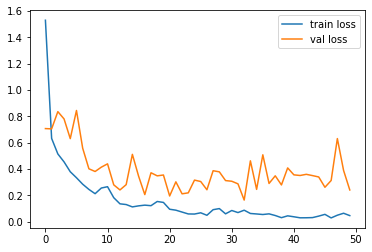

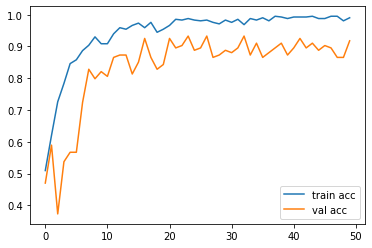

<Figure size 432x288 with 0 Axes>

In [37]:
# plot the loss
plt.plot(run.history['loss'], label='train loss')
plt.plot(run.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(run.history['accuracy'], label='train acc')
plt.plot(run.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [38]:

from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [39]:
y_pred = model.predict(test_set)

In [40]:
y_pred

array([[1.00000000e+00, 1.01751633e-37],
       [6.00964576e-02, 9.39903557e-01],
       [1.00000000e+00, 2.72018186e-10],
       [1.11289985e-01, 8.88709962e-01],
       [9.99998808e-01, 1.22613221e-06],
       [1.64718125e-02, 9.83528137e-01],
       [1.91443980e-01, 8.08556020e-01],
       [1.00000000e+00, 1.44099461e-30],
       [9.99992132e-01, 7.83060841e-06],
       [1.00000000e+00, 1.10720286e-08],
       [7.38056839e-01, 2.61943191e-01],
       [8.36573124e-01, 1.63426876e-01],
       [1.00000000e+00, 1.91798201e-19],
       [3.28048761e-03, 9.96719539e-01],
       [8.23508382e-01, 1.76491663e-01],
       [1.00000000e+00, 8.36686831e-10],
       [9.99948859e-01, 5.11438375e-05],
       [1.00000000e+00, 1.49471391e-09],
       [2.07333770e-02, 9.79266584e-01],
       [1.64389908e-02, 9.83561039e-01],
       [7.15463469e-03, 9.92845356e-01],
       [1.00000000e+00, 4.59228424e-08],
       [1.00000000e+00, 1.32275269e-18],
       [1.00000000e+00, 8.27248410e-36],
       [6.049295

In [41]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [42]:
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0], dtype=int64)

In [43]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [44]:
model=load_model('model_vgg19.h5')

In [71]:
img=image.load_img("E:\projects\Malaria-Detection-master\Dataset\Test\Parasite\one.png",target_size=(224,224))
x=image.img_to_array(img)
x


array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [59]:
x=x/255

In [60]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [61]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [62]:
a=np.argmax(model.predict(img_data), axis=1)

In [63]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
